## Simulated Annealing solving Traveller Salesman Problem with Maharashtra Cities as nodes
#### Import necessary Libraries:
#####  geopy is used to locate the coordinates of the address. While geocoders include Nominatim which is a geocoding software.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "Sarang")


#### Gather coordinates of cities mentioned

In [4]:
Cities_key = ["Mumbai","Pune","Nagpur","Nashik","Thane","Aurangabad",
              "Solapur","Amravati","Kolhapur","Navi Mumbai","Akola",
              "Jalgaon","Latur","Sangli","Bhiwandi","Dhule","Ahmednagar",
              "Chandrapur","Parbhani","Jalna"]                                    # Nodes

Cities_index = list(range(len(Cities_key)))                                       # Indexing the nodes

X_Cities = []                                          # X-coordinates
Y_Cities = []                                          # Y-coordinates
for i in Cities_key:
    location = geolocator.geocode(i)
    Y_Cities.append(location.latitude)
    X_Cities.append(location.longitude)
print("X-Coordinates : ")
print(X_Cities)
print("Y-Coordinates : ")
print(Y_Cities)

X-Coordinates : 
[72.878176, 73.8544541, 79.0820556, 73.7902364, 72.9701779, 75.3390241, 75.27632027348457, 77.64429617998744, 74.2405329, 73.0198537, 77.1921156663574, 75.52612463784979, 76.75542361334745, 74.58676543279755, 73.08048927121621, 74.49006143365727, 74.85802430085195, 79.50454752230621, 76.60264434278307, 75.87085986165867]
Y-Coordinates : 
[19.0785451, 18.521428, 21.1498134, 20.0112475, 19.1943294, 19.877263, 17.84990665, 21.15454115, 16.7028412, 19.0308262, 20.76181225, 20.84288265, 18.35159075, 17.1726928, 19.362530800000002, 21.1305215, 19.162772500000003, 20.0967555, 19.29019805, 19.918832950000002]


#### Functions defined as follows:

In [5]:
def Distance(X1,X2,Y1,Y2):                                                  # Euclidean Distance
    return np.sqrt(((X2-X1)**2)+((Y2-Y1)**2))                               

def dist(current_path):                                                     # Traveller Salesman Path Distance
  Cost = 0
  for i in range(len(current_path)-1):
    Cost = Cost + City_Distance[current_path[i]][current_path[i+1]]
  Cost = Cost + City_Distance[current_path[-1]][current_path[0]]
  return Cost

def Reverse_path(Nodes):                                                    # Reversing the nodes segment
    nodes = np.random.choice(Nodes,size=2,replace=False)
    a = nodes[0]
    b = nodes[1]
    if a < b:
        section = Nodes[a:b+1]
        section = section[-1::-1]
        Nodes[a:b+1] = section
        return Nodes
    else:
        section = Nodes[b:a+1]
        section = section[-1::-1]
        Nodes[b:a+1] = section
        return Nodes

def Transport_path(node):                                                    # Transporting the nodes segment
    import numpy as np
    Len = list(range(len(node)))
    i = 0
    while i!=1:
        n = np.sort(np.random.choice(Len,size=2,replace=False))
        if (len(node[n[0]:n[1]+1]) <= len(node)-3):
            no = np.delete(node, range(n[0],n[1]+1))
            b = np.random.choice(range(len(no)))
            no = np.insert(no,b,values=node[n[0]:n[1]+1])
            i=1
    return no

#### Creating Cost Adjencency Matrix i.e. Distance Matrix

In [6]:
City_Distance = []
for i in range(len(Cities_index)):
    Dist = []
    for j in range(len(Cities_index)):
        if i == j:
            Dist.append(0)
        else:
            d = Distance(X_Cities[i],X_Cities[j],Y_Cities[i],Y_Cities[j])
            Dist.append(d)
    City_Distance.append(Dist)

#### Simulated Annealing Algorithm

Best Path : [ 4  0 14  1 13  8  6 10  7  2 17 18  3  5 19 11 15 12 16  9]
Best Path Distance 28.91861804120104


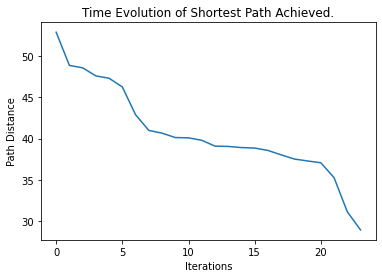

In [7]:
current_path = np.random.choice(Cities_index,size=len(Cities_key),replace=False)      # Randomly choose current path

initial_temp = 1000                        # Set initial temperature
alpha = 0.99                               # Cooling rate
Current = []                               # Current path
Process = [0,1]                            # 0 = Reversing the path segment, 1 = Transporting the path segment
Best = []                                  # Best path aquired
current_dist = dist(current_path)          # Distance of current path
best_path = current_path                   # Initialise current path as best path and its distance as best distance
best_dist = current_dist

while initial_temp > 1:                    # Loop of temperature 

    success = 0                            # Calculating successful paths aquired
    
    for i in range(100*len(Cities_index)): # Extra Loop of 100*N uptill 10*N successful paths aquired
        P = random.choice(Process)         # Choose methods
        if P==0:
            new_path = Reverse_path(current_path)
            new_dist = dist(new_path)
        elif P==1:
            new_path = Transport_path(current_path)
            new_dist = dist(new_path)
        
        if new_dist <= current_dist :              # Select new path if its distance is less than current path
            current_dist = new_dist
            current_path = new_path
            success = success + 1
            
            if new_dist < best_dist:               # Select new path if its distance is less than best path
                best_dist = new_dist
                best_path = new_path
                Best.append(best_dist)
        
        else:
            num = random.random()
            P = np.exp(-(new_dist-current_dist)/initial_temp)     # Boltzman probability
            
            if P > num:                                           # If boltzman probability is greater than randomly selected number
                current_path = new_path
                current_dist = new_dist                           # Select current distance

        Current.append(current_dist)

        if success == (10*len(Cities_index)):                    
            break
    
    initial_temp = initial_temp*alpha
 
print(f"Best Path : {best_path}")
print(f"Best Path Distance {best_dist}")

plt.plot(Best)
plt.xlabel("Iterations")
plt.ylabel("Path Distance")
plt.title("Time Evolution of Shortest Path Achieved.")
plt.show()

#### Plotting the map of the cities

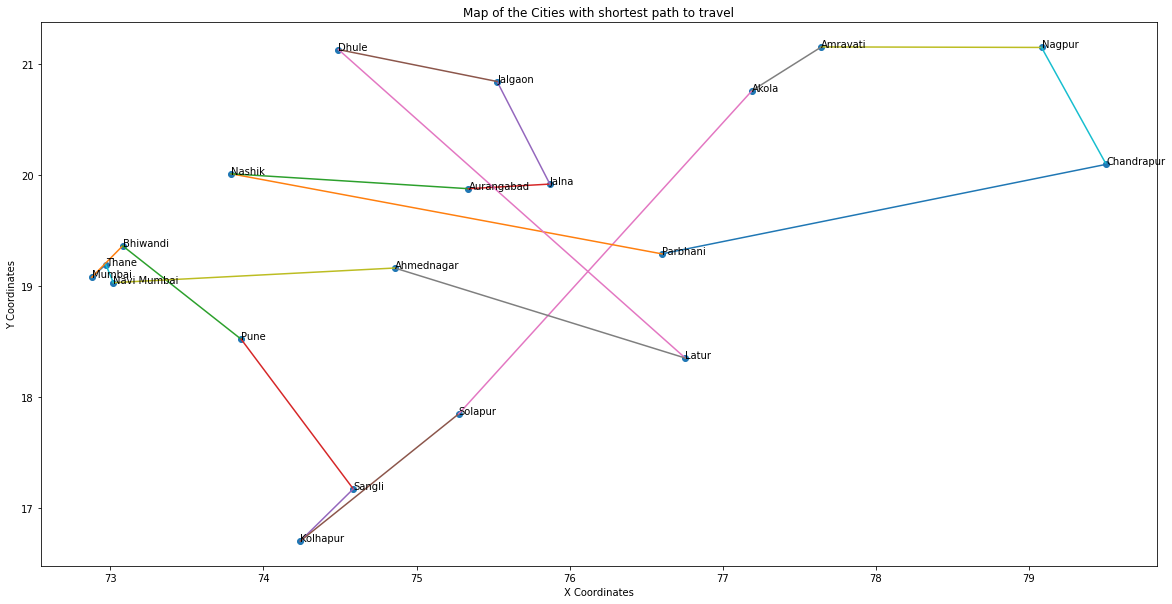

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.scatter(X_Cities,Y_Cities)
for i in range(len(best_path)-1):
    plt.plot([X_Cities[best_path[i]],X_Cities[best_path[i+1]]],[Y_Cities[best_path[i]],Y_Cities[best_path[i+1]]])
plt.plot([X_Cities[best_path[-1]],X_Cities[best_path[0]]],[Y_Cities[best_path[-1]],Y_Cities[best_path[0]]])
for i in range(len(Cities_index)):
    plt.text(X_Cities[i],Y_Cities[i], f'{Cities_key[i]}')

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.title("Map of the Cities with shortest path to travel")
plt.show()